In [73]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 
from word2number import w2n
import math

In [51]:
df = pd.read_csv("hiring.csv")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [52]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [53]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [59]:
t_median = math.floor(df['test_score(out of 10)'].mean())
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(t_median)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [60]:
reg = linear_model.LinearRegression()
reg.fit(df[["experience", "test_score(out of 10)", "interview_score(out of 10)"]], df[["salary($)"]])

LinearRegression()

In [61]:
reg.coef_

array([[2922.26901502, 2221.30909959, 2147.48256637]])

In [62]:
reg.intercept_

array([14992.65144669])

In [70]:
math.floor(reg.predict([[1,10,10]]))

/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


61602

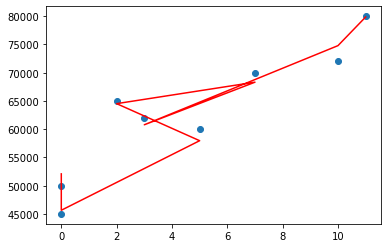

In [80]:
%matplotlib inline
plt.scatter(df['experience'], df['salary($)'])
plt.plot(df.experience, reg.predict(df[["experience", "test_score(out of 10)", "interview_score(out of 10)"]]),color="red")